In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing of VIF 
from sklearn.decomposition import PCA

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('restaurant.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print(df.shape)

(9551, 21)


I am dropping all the columns that are not required or have no importnace at all

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.drop(["Restaurant ID","Restaurant Name","City","Address","Locality","Locality Verbose","Longitude","Latitude","Cuisines"],axis=1,inplace=True)

All the unncessary columns that are not required by understanding the features are been dropped

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Average Cost for two  9551 non-null   int64  
 2   Currency              9551 non-null   object 
 3   Has Table booking     9551 non-null   object 
 4   Has Online delivery   9551 non-null   object 
 5   Is delivering now     9551 non-null   object 
 6   Switch to order menu  9551 non-null   object 
 7   Price range           9551 non-null   int64  
 8   Aggregate rating      9551 non-null   float64
 9   Rating color          9551 non-null   object 
 10  Rating text           9551 non-null   object 
 11  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 895.5+ KB


In [8]:
df['Country Code'] = df['Country Code'].replace(1,"India")
df['Country Code'] = df['Country Code'].replace(14,"Australia")
df['Country Code'] = df['Country Code'].replace(30,"Brazil")
df['Country Code'] = df['Country Code'].replace(37,"Canada")
df['Country Code'] = df['Country Code'].replace(94,"Indonesia")
df['Country Code'] = df['Country Code'].replace(148,"New Zealand")
df['Country Code'] = df['Country Code'].replace(162,"Phillipines")
df['Country Code'] = df['Country Code'].replace(166,"Qatar")
df['Country Code'] = df['Country Code'].replace(189,"South Africa")
df['Country Code'] = df['Country Code'].replace(191,"Sri Lanka")
df['Country Code'] = df['Country Code'].replace(214,"UAE")
df['Country Code'] = df['Country Code'].replace(215,"United Kingdom")
df['Country Code'] = df['Country Code'].replace(216,"United States")
df['Country Code'] = df['Country Code'].replace(208,"Turkey")
df['Country Code'] = df['Country Code'].replace(184,"Singapore")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   object 
 1   Average Cost for two  9551 non-null   int64  
 2   Currency              9551 non-null   object 
 3   Has Table booking     9551 non-null   object 
 4   Has Online delivery   9551 non-null   object 
 5   Is delivering now     9551 non-null   object 
 6   Switch to order menu  9551 non-null   object 
 7   Price range           9551 non-null   int64  
 8   Aggregate rating      9551 non-null   float64
 9   Rating color          9551 non-null   object 
 10  Rating text           9551 non-null   object 
 11  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 895.5+ KB


**Exploratory Data Analysis**

In [10]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   object 
 1   Average Cost for two  9551 non-null   int64  
 2   Currency              9551 non-null   object 
 3   Has Table booking     9551 non-null   object 
 4   Has Online delivery   9551 non-null   object 
 5   Is delivering now     9551 non-null   object 
 6   Switch to order menu  9551 non-null   object 
 7   Price range           9551 non-null   int64  
 8   Aggregate rating      9551 non-null   float64
 9   Rating color          9551 non-null   object 
 10  Rating text           9551 non-null   object 
 11  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 895.5+ KB


***Check for duplicates***

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape 

(6680, 12)

There are some duplicates that are been removed

***Check for null values***

In [14]:
df.isnull().sum()

Country Code            0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

All the null values are dropped

In [15]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

***check for outliers***

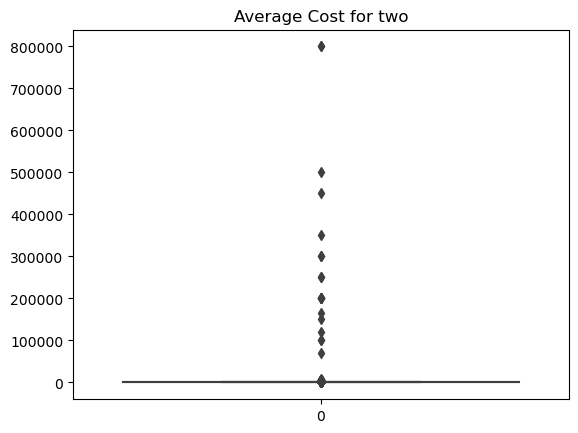

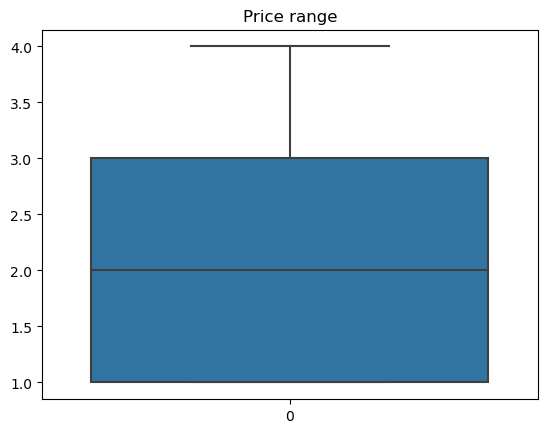

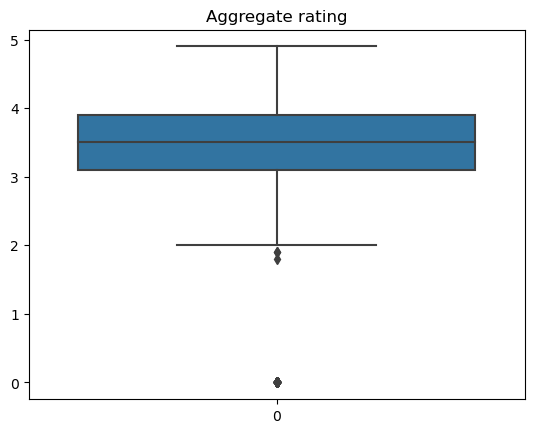

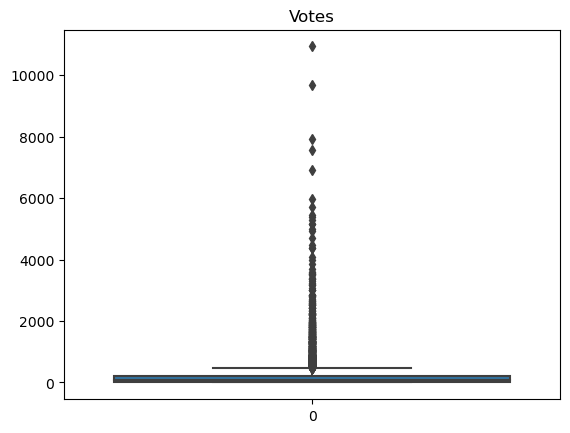

In [16]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()


In [17]:
for i in numerical_cols:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

-450.0
1550.0
-2.0
6.0
1.9000000000000004
5.1
-245.0
475.0


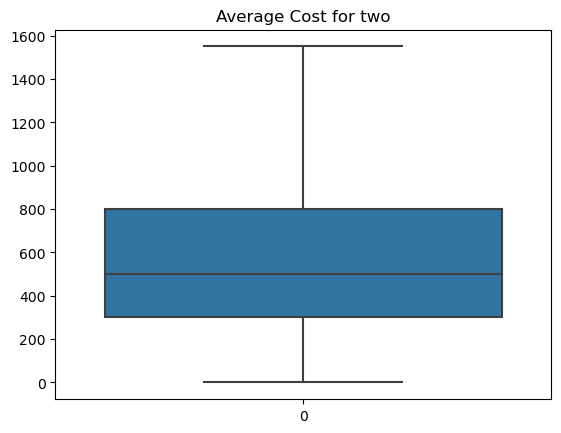

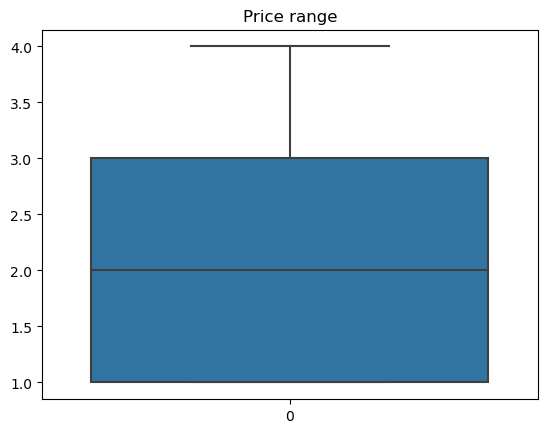

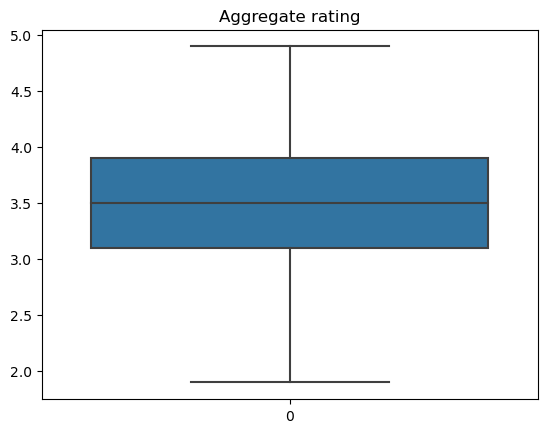

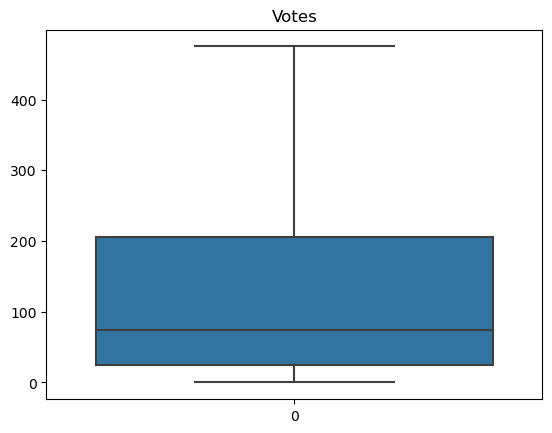

In [18]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

So the outliers which are present in some of the features are also removed

***check for skewness***

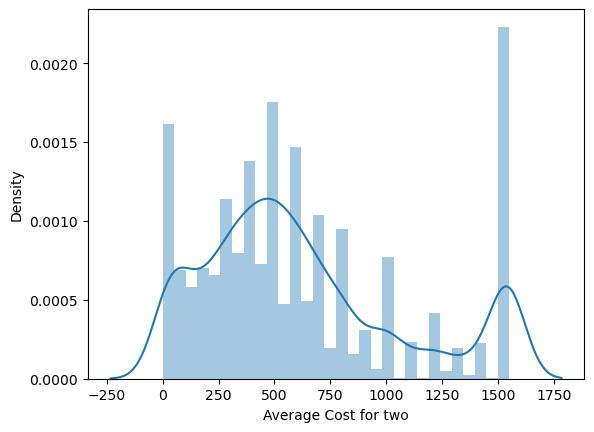

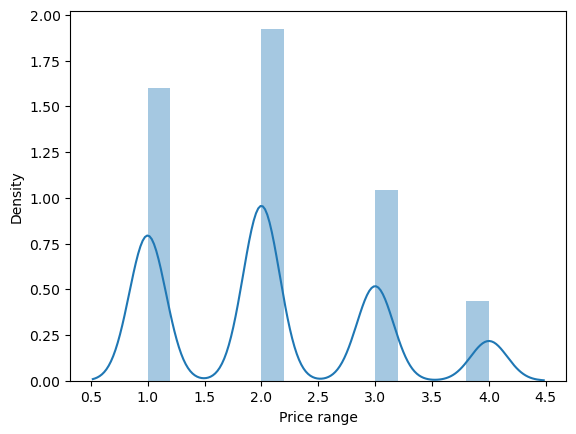

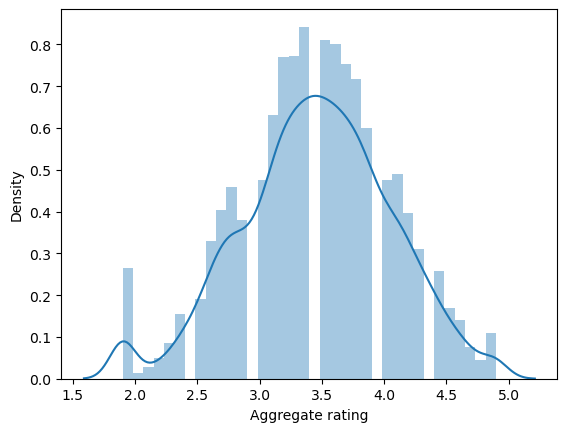

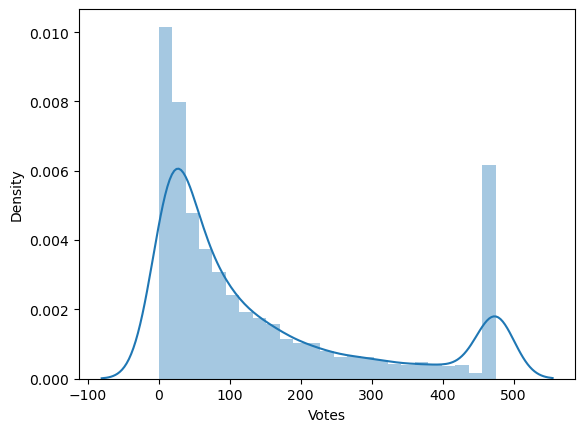

In [19]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [20]:
for i in numerical_cols:
    df[i] = np.sqrt(df[i])

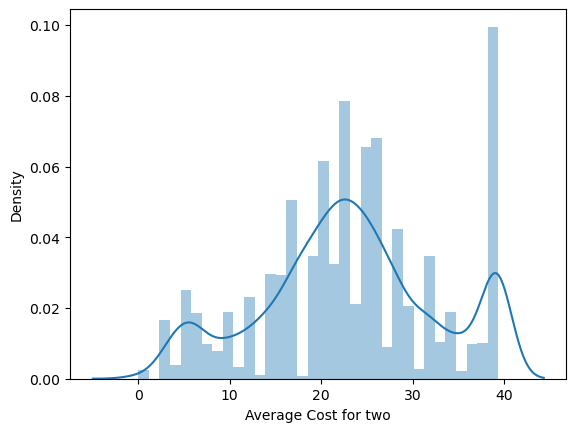

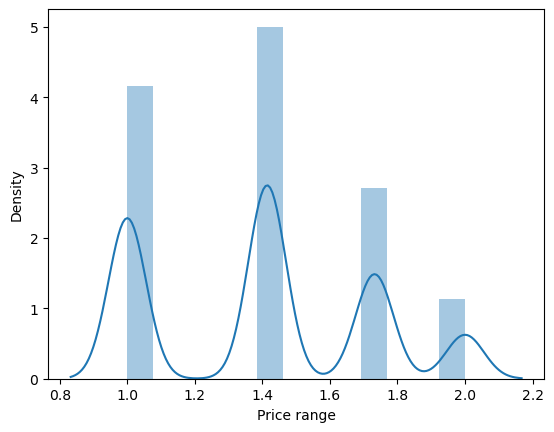

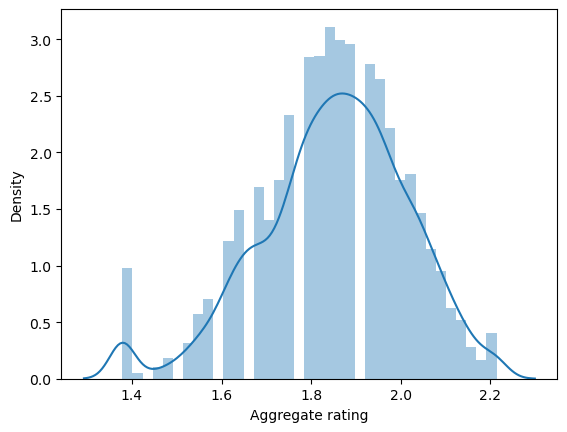

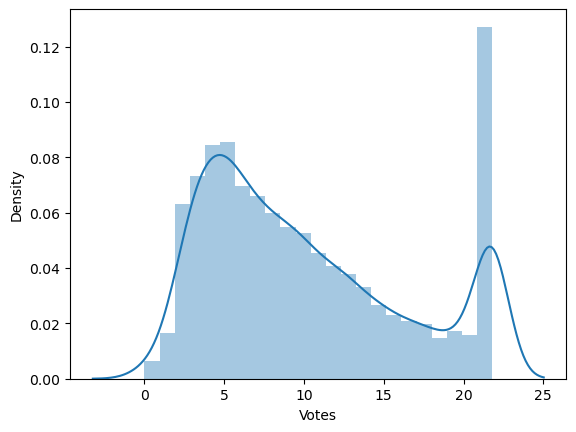

In [21]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Skewness is managed

***encoding***

In [22]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [23]:
df[categorical_cols]

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Phillipines,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
1,Phillipines,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
2,Phillipines,Botswana Pula(P),Yes,No,No,No,Green,Very Good
3,Phillipines,Botswana Pula(P),No,No,No,No,Dark Green,Excellent
4,Phillipines,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
...,...,...,...,...,...,...,...,...
9546,Turkey,Turkish Lira(TL),No,No,No,No,Green,Very Good
9547,Turkey,Turkish Lira(TL),No,No,No,No,Green,Very Good
9548,Turkey,Turkish Lira(TL),No,No,No,No,Yellow,Good
9549,Turkey,Turkish Lira(TL),No,No,No,No,Green,Very Good


In [24]:
df['Country Code'].value_counts()

Country Code
India             5787
United States      428
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [25]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df.head()

,Country Code,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6,33.166248,0,1,0,0,0,1.732051,2.190890,0,1,17.720045
1,6,34.641016,0,1,0,0,0,1.732051,2.121320,0,1,21.794495
2,6,39.370039,0,1,0,0,0,2.000000,2.097618,1,5,16.431677
3,6,38.729833,0,0,0,0,0,2.000000,2.213594,0,1,19.104973
4,6,38.729833,0,1,0,0,0,2.000000,2.190890,0,1,15.132746


***Check for Correlation between feautures***

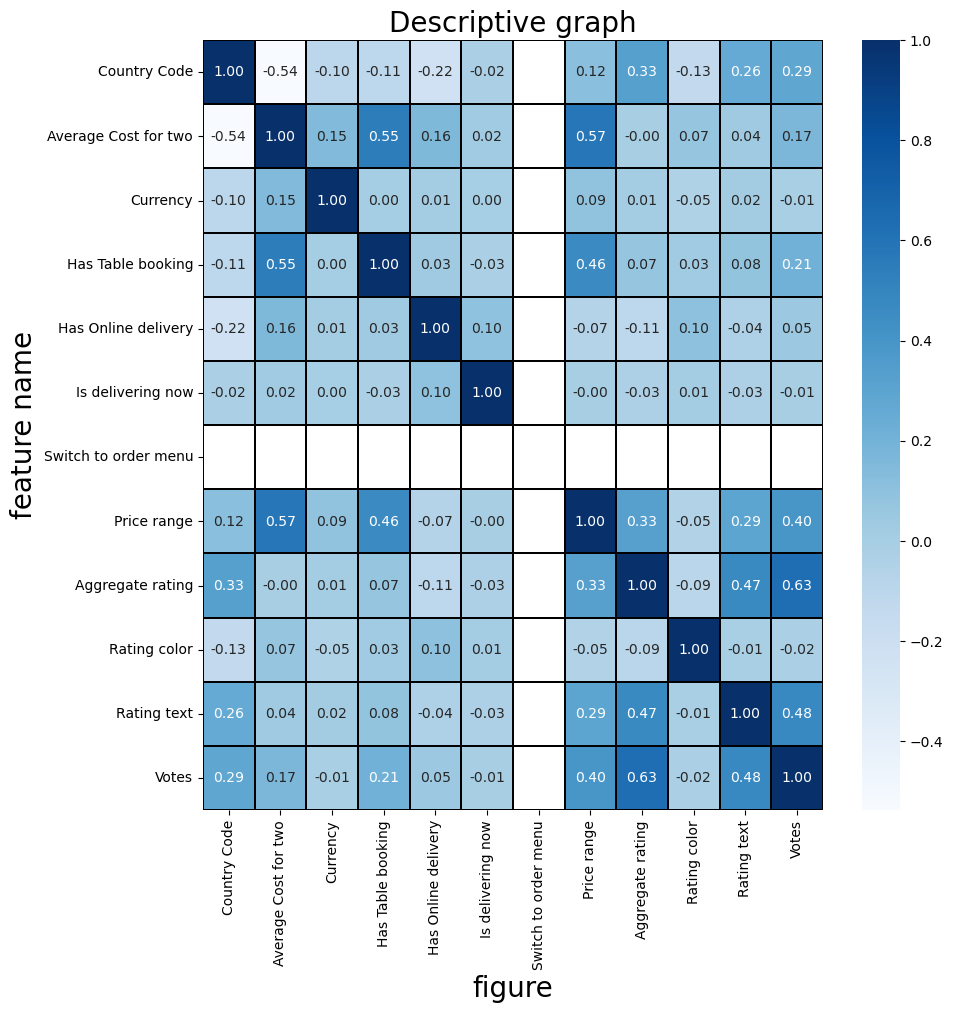

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [27]:
df.drop("Switch to order menu",axis=1,inplace=True)

In [28]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [29]:
calc_vif(df)

,Variables,VIF FACTOR
0,Country Code,6.960685
1,Average Cost for two,27.425599
2,Currency,14.266952
3,Has Table booking,1.869459
4,Has Online delivery,1.661015
5,Is delivering now,1.017756
6,Price range,50.894776
7,Aggregate rating,43.493541
8,Rating color,3.789623
9,Rating text,2.468878


***PART1 REGRESSION MODEL AVERAGE COST FOR TWO**

***check of correlation with the features with the target***

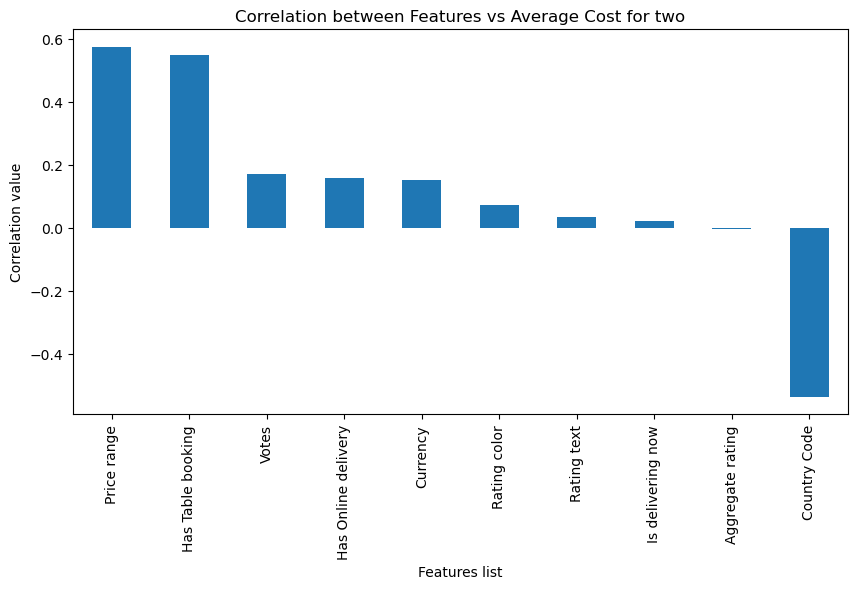

In [30]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['Average Cost for two'].sort_values(ascending=False).drop('Average Cost for two').plot.bar()
plt.title("Correlation between Features vs Average Cost for two")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [31]:
df.drop(['Is delivering now','Aggregate rating'],axis=1,inplace=True)

***Splitting of data into features and target***

In [32]:
x=df.drop(['Average Cost for two'],axis=1)
y=df['Average Cost for two']

***Scaling or standardization of parameters***

In [33]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.63035545, -3.63743754,  2.21619142, ..., -1.67784855,
        -0.35489339,  1.20944308],
       [ 0.63035545, -3.63743754,  2.21619142, ..., -1.67784855,
        -0.35489339,  1.85896251],
       [ 0.63035545, -3.63743754,  2.21619142, ..., -1.06558873,
         1.8643323 ,  1.00406066],
       ...,
       [ 2.24133348,  6.44133279, -0.45122456, ...,  1.38345056,
         0.19991303,  1.85896251],
       [ 2.24133348,  6.44133279, -0.45122456, ..., -1.06558873,
         1.8643323 ,  1.85896251],
       [ 2.24133348,  6.44133279, -0.45122456, ..., -1.06558873,
         1.8643323 ,  1.85896251]])

***Find the best random score***

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.7801357753084287
random state  121


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [37]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=121)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [38]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.7801357753084287
R2 score train data : 74.64822386592186
Mean absolute error: 3.110975015884941
Mean squared error: 20.762330141262044
Root Mean squared error: 1.763795627584143


In [39]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.9045421027835554
R2 score train data : 95.73097137826724
Mean absolute error: 2.2036845363327267
Mean squared error: 9.014328635678496
Root Mean squared error: 1.4844812347526413


In [40]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.8897747783424553
R2 score train data : 91.58438104445501
Mean absolute error: 2.319050054823189
Mean squared error: 10.408844118037463
Root Mean squared error: 1.522842754463897


In [41]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.780129172079012
R2 score train data : 74.64822069364155
Mean absolute error: 3.11108740807733
Mean squared error: 20.76295370077629
Root Mean squared error: 1.7638274881850917


In [42]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: 0.7361740273553707
R2 score train data : 70.58016439380009
Mean absolute error: 3.4793398519741183
Mean squared error: 24.913748253366258
Root Mean squared error: 1.865298863982423


Out of this Random Forest regressor gives the best results

***Hyperparameter tuning for regression***

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=121)

model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9116611906294629
Test Set Score: 0.9194485711210078


In [45]:
best_model = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=5,min_samples_leaf=1)

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
print(best_model.score(x_test, y_test))

Test MSE: 7.620930563991872
0.9192975943220156


***saving the model***

In [46]:
import joblib

joblib.dump(best_model, 'Avg_for_two.joblib')

['Avg_for_two.joblib']

In [47]:
loaded_model = joblib.load('Avg_for_two.joblib')

In [48]:
x

,Country Code,Currency,Has Table booking,Has Online delivery,Price range,Rating color,Rating text,Votes
0,6,0,1,0,1.732051,0,1,17.720045
1,6,0,1,0,1.732051,0,1,21.794495
2,6,0,1,0,2.000000,1,5,16.431677
3,6,0,0,0,2.000000,0,1,19.104973
4,6,0,1,0,2.000000,0,1,15.132746
...,...,...,...,...,...,...,...,...
9546,11,11,0,0,1.732051,1,5,21.794495
9547,11,11,0,0,1.732051,1,5,21.794495
9548,11,11,0,0,2.000000,5,2,21.794495
9549,11,11,0,0,2.000000,1,5,21.794495


***test the model***

In [49]:
t=np.array([11,11,0,0,1.732051,1,5,21.794495])

In [50]:
t=t.reshape(1,-1)

In [51]:
loaded_model.predict(t) 

array([8.83300524])

We are getting proper results

# ***PART2 price range***

***Checking of correlation with the target***

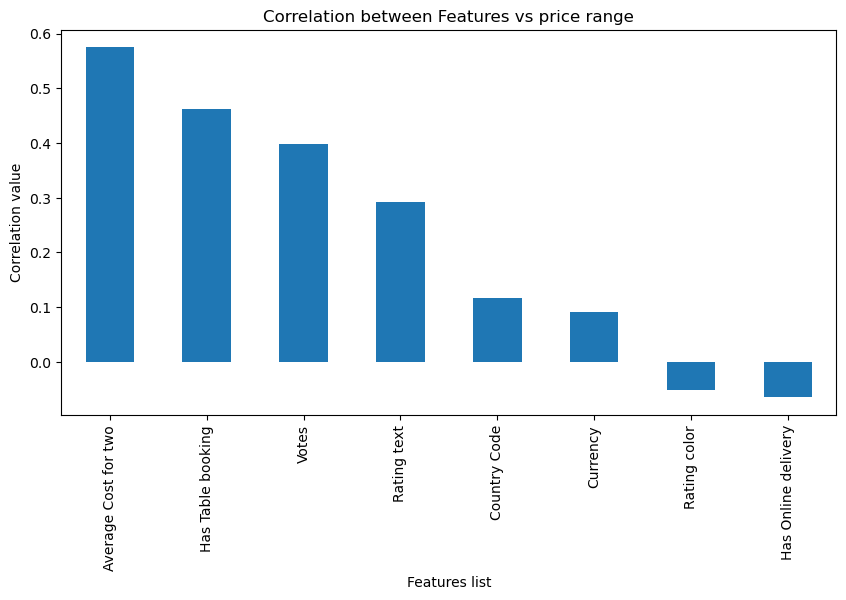

In [52]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['Price range'].sort_values(ascending=False).drop('Price range').plot.bar()
plt.title("Correlation between Features vs price range")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

***Splitting of data into features and target***

In [53]:
x=df.drop(['Price range'],axis=1)
y=df['Price range']

***Scaling or standardization of parameters***

In [54]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.63035545,  1.05329426, -3.63743754, ..., -1.67784855,
        -0.35489339,  1.20944308],
       [ 0.63035545,  1.20693991, -3.63743754, ..., -1.67784855,
        -0.35489339,  1.85896251],
       [ 0.63035545,  1.69962332, -3.63743754, ..., -1.06558873,
         1.8643323 ,  1.00406066],
       ...,
       [ 2.24133348, -1.04368307,  6.44133279, ...,  1.38345056,
         0.19991303,  1.85896251],
       [ 2.24133348, -1.26079543,  6.44133279, ..., -1.06558873,
         1.8643323 ,  1.85896251],
       [ 2.24133348, -1.6294209 ,  6.44133279, ..., -1.06558873,
         1.8643323 ,  1.85896251]])

***Find the best random score***

In [55]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.6492698423012464
random state  149


In [56]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=149)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [57]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.6492698423012464
R2 score train data : 58.94873537877696
Mean absolute error: 0.1453556992481399
Mean squared error: 0.03838041134178813
Root Mean squared error: 0.3812554252048617


In [58]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.9412174462847982
R2 score train data : 98.73340621242356
Mean absolute error: 0.0307018413152628
Mean squared error: 0.00643257656003449
Root Mean squared error: 0.17521940907120648


In [59]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.8971811516930793
R2 score train data : 93.36325707174935
Mean absolute error: 0.05387465324215
Mean squared error: 0.011251469555971283
Root Mean squared error: 0.23210914079835374


In [60]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.6492486355776148
R2 score train data : 58.94872233201196
Mean absolute error: 0.1453813076543481
Mean squared error: 0.03838273199417097
Root Mean squared error: 0.3812890080429124


In [61]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: -0.0006621412126073256
R2 score train data : 0.0
Mean absolute error: 0.26382282373821814
Mean squared error: 0.10950248717101078
Root Mean squared error: 0.5136368597931987


So the best model is randomForest regressor

**Hyper parameter tuning**

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=149)

model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.953156987185303
Test Set Score: 0.9471341540887187


In [63]:
best_model = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=5,min_samples_leaf=1)

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
print(best_model.score(x_test, y_test))

Test MSE: 0.005766583315135192
0.9473034653670249


***Saving the model***

In [64]:
import joblib

joblib.dump(best_model, 'price_range.joblib')

['price_range.joblib']

In [65]:
loaded_model = joblib.load('price_range.joblib')

In [66]:
x

,Country Code,Average Cost for two,Currency,Has Table booking,Has Online delivery,Rating color,Rating text,Votes
0,6,33.166248,0,1,0,0,1,17.720045
1,6,34.641016,0,1,0,0,1,21.794495
2,6,39.370039,0,1,0,1,5,16.431677
3,6,38.729833,0,0,0,0,1,19.104973
4,6,38.729833,0,1,0,0,1,15.132746
...,...,...,...,...,...,...,...,...
9546,11,8.944272,11,0,0,1,5,21.794495
9547,11,10.246951,11,0,0,1,5,21.794495
9548,11,13.038405,11,0,0,5,2,21.794495
9549,11,10.954451,11,0,0,1,5,21.794495


In [67]:
t=np.array([6,38.729833,0,1,0,0,1,15.132746])

In [68]:
t=t.reshape(1,-1)

In [69]:
loaded_model.predict(t) 

array([1.91468342])

We are getting proper results

**COMPLETED**